#####   Business Objectives

The aim of analysis is to identify the root cause of the problem (i.e. cancellation and non-availability of cars) and recommend ways to improve the situation. As a result of your analysis, you should be able to present to the client the root cause(s) and possible hypotheses of the problem(s) and recommend ways to improve them. 


There are six attributes associated with each request made by a customer:

**Request id:** A unique identifier of the request  
**Time of request:** The date and time at which the customer made the trip request  
**Drop-off time:** The drop-off date and time, in case the trip was completed   
**Pick-up point:** The point from which the request was made  
**Driver id:** The unique identification number of the driver  
**Status of the request:** The final status of the trip, that can be either completed, cancelled by the driver or no cars available  
**Note:** For this assignment, only the trips to and from the airport are being considered.  

 

**Data Cleaning and Preparation - Hints**

1. Identify the data quality issues and clean the data so that you can use it for analysis.
2. Ensure that the dates and time are in the proper format. Derive new variables which will be useful for analysis.

In [1]:
import warnings

warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
uber_df = pd.read_csv("../Dataset/Uber Request Data.csv")

uber_df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [4]:
# Get Column Type Info
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


<IPython.core.display.Javascript object>

In [5]:
# Get Data Data Description
uber_df.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


<IPython.core.display.Javascript object>

In [6]:
len(uber_df)

6745

<IPython.core.display.Javascript object>

In [7]:
# Get Unique Values Count of
len(uber_df["Request id"].value_counts())

if len(uber_df["Request id"].value_counts()) == len(uber_df):
    print("There's no duplicate record in dataframe")

There's no duplicate record in dataframe


<IPython.core.display.Javascript object>

In [8]:
# Unique Value of columns
print("Pickup Point Values: ")
print("")
print(uber_df["Pickup point"].value_counts())
print("")
print("Trip Status Values: ")
print("")
print(uber_df["Status"].value_counts())

Pickup Point Values: 

City       3507
Airport    3238
Name: Pickup point, dtype: int64

Trip Status Values: 

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64


<IPython.core.display.Javascript object>

## Data Cleaning

In [9]:
# null Percentage
def nullPercentage(df):
    print(round(df.isnull().sum() / len(df.index) * 100, 2))

<IPython.core.display.Javascript object>

In [10]:
# Fixed Messy Column
uber_df.columns = (
    uber_df.columns.str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("(", "")
    .str.replace(")", "")
)
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
request_id           6745 non-null int64
pickup_point         6745 non-null object
driver_id            4095 non-null float64
status               6745 non-null object
request_timestamp    6745 non-null object
drop_timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


<IPython.core.display.Javascript object>

In [11]:
nullPercentage(uber_df)

request_id            0.00
pickup_point          0.00
driver_id            39.29
status                0.00
request_timestamp     0.00
drop_timestamp       58.03
dtype: float64


<IPython.core.display.Javascript object>

In [12]:
# Check driver_id is null for status other than - No Cars Available
uber_df.loc[
    (uber_df["status"] != "No Cars Available") & (uber_df["driver_id"].isnull())
]

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp


<IPython.core.display.Javascript object>

We can see that driver_id is null when there's no cars available, not in any other cases. Thus, we can ignore null driver_id as driver_id will always null if there's no cars available

In [13]:
# Check drop_timestamp is null for status other than - No Cars Available & Cancelled
uber_df.loc[
    (uber_df["status"] != "Cancelled")
    & (uber_df["status"] != "No Cars Available")
    & (uber_df["drop_timestamp"].isnull())
]

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp


<IPython.core.display.Javascript object>

We can see that drop_timestamp is null when there's no cars available & Cancelled, not in any other cases. Thus, we can ignore null as drop_timestamp will always null if there's no cars available or Cancelled

In [14]:
# Impute Null with Zeros
uber_df.loc[np.isnan(uber_df["driver_id"]), ["driver_id"]] = 0
uber_df.loc[pd.isnull(uber_df["drop_timestamp"]), ["drop_timestamp"]] = 0

<IPython.core.display.Javascript object>

In [15]:
# Convert to Datetime
uber_df["request_timestamp"] = pd.to_datetime(uber_df["request_timestamp"])
uber_df["drop_timestamp"] = pd.to_datetime(uber_df["drop_timestamp"])

<IPython.core.display.Javascript object>

In [16]:
# Derived Variables  of request_timestamp
uber_df["request_date"] = uber_df["request_timestamp"].dt.date
uber_df["request_time"] = uber_df["request_timestamp"].dt.time
uber_df["request_day"] = uber_df["request_timestamp"].dt.weekday_name
uber_df["request_hour"] = uber_df["request_timestamp"].dt.hour

# Derived Variables  of drop_timestamp
uber_df["drop_date"] = uber_df["drop_timestamp"].dt.date
uber_df["drop_time"] = uber_df["drop_timestamp"].dt.time
uber_df["drop_day"] = uber_df["drop_timestamp"].dt.weekday_name
uber_df["drop_hour"] = uber_df["drop_timestamp"].dt.hour

<IPython.core.display.Javascript object>

## EDA : Univariant Analysis :

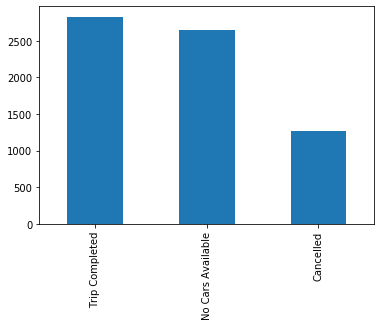

<IPython.core.display.Javascript object>

In [17]:
# Rank- Frequency Plot - Status
uber_df["status"].value_counts().plot("bar")

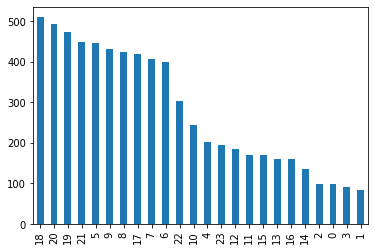

<IPython.core.display.Javascript object>

In [18]:
uber_df["request_hour"].value_counts().plot("bar")

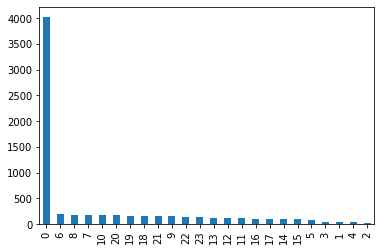

<IPython.core.display.Javascript object>

In [19]:
uber_df["drop_hour"].value_counts().plot("bar")

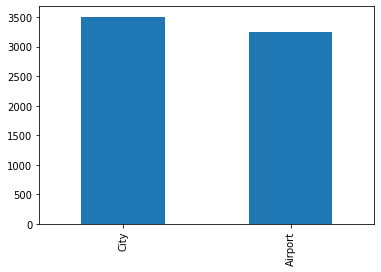

<IPython.core.display.Javascript object>

In [20]:
uber_df["pickup_point"].value_counts().plot("bar")

**Insights from Univariant Analysis :**
* Frequency of No Cars Available is higher than Cancelled Trip Status
* Hightest Request Hours are 18,20,19,21,5,9,8,17,7,6
* Highest Drop Hour is 12 AM midnight


**This leads to Question that highest request hours are not aligned with high drop hour, which means that there must be supply- demand gap happening between these hours.** 

## EDA : Segment Univariant Analysis

In [21]:
# Derived Column for cancelled trips
uber_df["is_cancelled_trip"] = uber_df.status.apply(
    lambda x: 1 if x == "Cancelled" else 0
)

# Derived Column for cancelled trips
uber_df["is_no_cars_available"] = uber_df.status.apply(
    lambda x: 1 if x == "No Cars Available" else 0
)

<IPython.core.display.Javascript object>

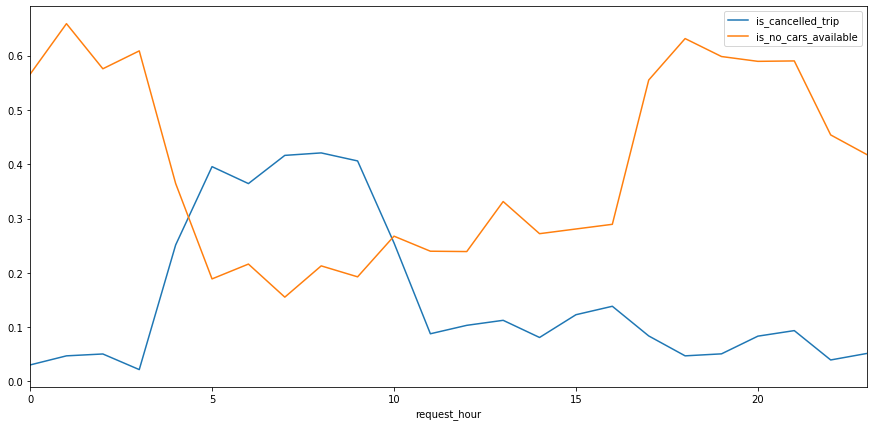

<IPython.core.display.Javascript object>

In [22]:
plt.figure(figsize=(15, 7))
uber_df.groupby(by=["request_hour"])["is_cancelled_trip"].mean().plot(
    "line", label="is_cancelled_trip"
)
uber_df.groupby(by=["request_hour"])["is_no_cars_available"].mean().plot(
    "line", label="is_no_cars_available"
)
plt.legend()

**Insights**
* There's high number of no car available status in late night(0-3), early morning time(4-6), evening(16-18) and night time (19-23)
* There's high number of cab cacelation happening in early morning and morning time

**This leads to question that even when cabs are available why there's high number of cancellation in morning and early morning time**

## EDA : Bivariant Analysis

In [23]:
uber_df["time_of_day"] = pd.cut(
    x=uber_df["request_hour"],
    bins=[0, 3, 6, 12, 15, 18, 23],
    include_lowest=True,
    labels=[
        "late-night(0-3)",
        "early-morning(4-6)",
        "morning(7-12)",
        "afternoon(13-15)",
        "evening(16-18)",
        "night(19-23)",
    ],
)
uber_df["time_of_day"].unique()

[morning(7-12), evening(16-18), night(19-23), early-morning(4-6), afternoon(13-15), late-night(0-3)]
Categories (6, object): [late-night(0-3) < early-morning(4-6) < morning(7-12) < afternoon(13-15) < evening(16-18) < night(19-23)]

<IPython.core.display.Javascript object>

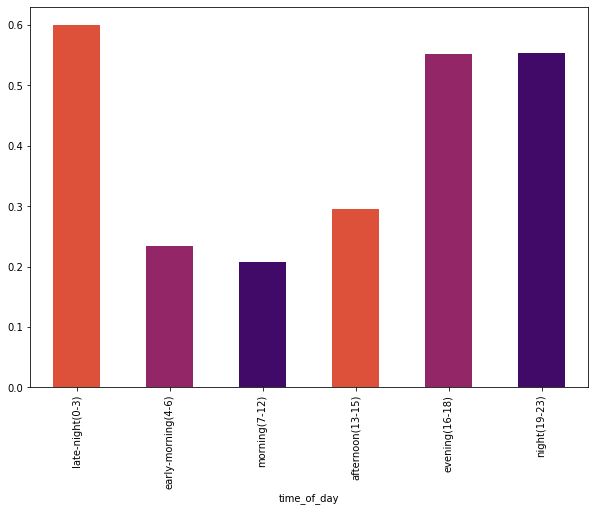

<IPython.core.display.Javascript object>

In [85]:
from matplotlib import cm

color = cm.inferno_r(np.linspace(0.4, 0.8, 3))

uber_df.groupby("time_of_day")["is_no_cars_available"].mean().plot(
    "bar", figsize=(10, 7), color=color, stacked=True
)

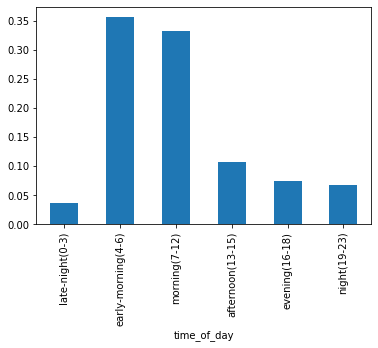

<IPython.core.display.Javascript object>

In [33]:
uber_df.groupby("time_of_day")["is_cancelled_trip"].mean().plot("bar")

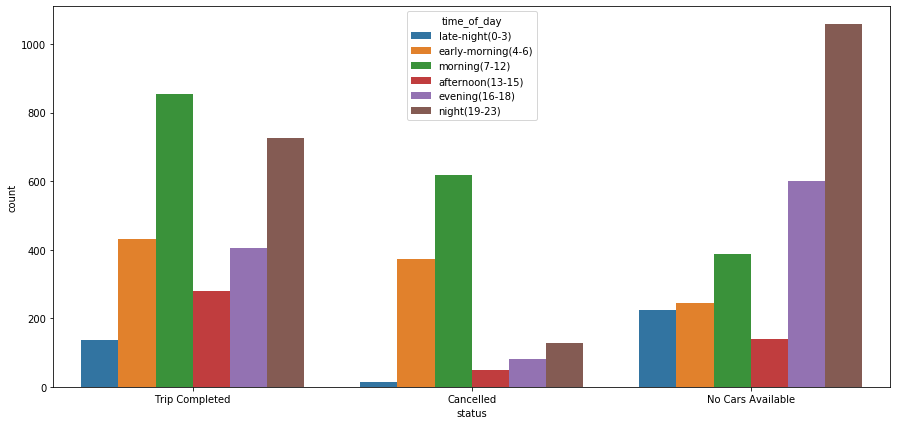

<IPython.core.display.Javascript object>

In [87]:
plt.figure(figsize=(15, 7))
sns.countplot(x="status", hue="time_of_day", data=uber_df)

**Effective Time Slot when status is no cab available or cancelled is : late-night, early-morning, evening & night**

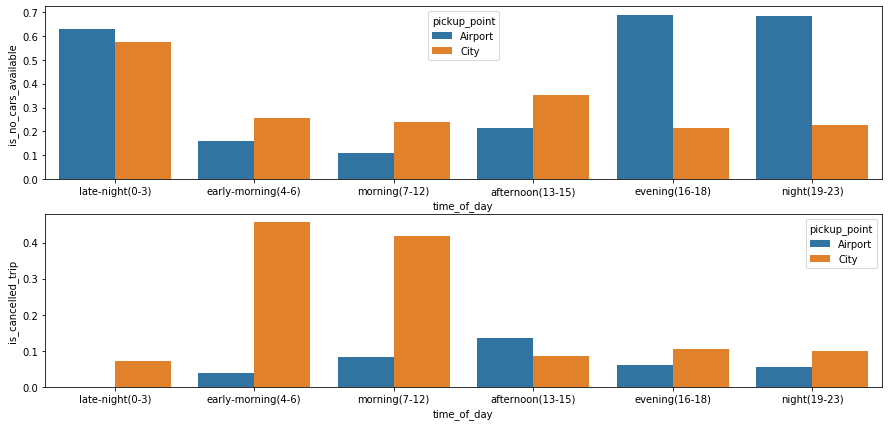

<IPython.core.display.Javascript object>

In [30]:
nocar_status_df = pd.DataFrame(
    uber_df.groupby(by=["time_of_day", "pickup_point"])["is_no_cars_available"].mean()
)
plt.figure(figsize=(15, 7))
plt.subplot(2, 1, 1)

sns.barplot(
    x=nocar_status_df.index.get_level_values("time_of_day"),
    y="is_no_cars_available",
    hue=nocar_status_df.index.get_level_values("pickup_point"),
    data=nocar_status_df,
)

plt.subplot(2, 1, 2)
cancelled_trip_status_df = pd.DataFrame(
    uber_df.groupby(by=["time_of_day", "pickup_point"])["is_cancelled_trip"].mean()
)

sns.barplot(
    x=cancelled_trip_status_df.index.get_level_values("time_of_day"),
    y="is_cancelled_trip",
    hue=cancelled_trip_status_df.index.get_level_values("pickup_point"),
    data=cancelled_trip_status_df,
)

In [41]:
cancelled_trip_status_df.head()

is_cancelled_trip
time_of_day        pickup_point                   
late-night(0-3)    Airport                0.000000
                   City                   0.072165
early-morning(4-6) Airport                0.039526
                   City                   0.456494
morning(7-12)      Airport                0.082803

<IPython.core.display.Javascript object>